Introdution




....

Problem and definition


...

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree      
from sklearn.model_selection import train_test_split  
from sklearn import metrics                          
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
sns.set()

After downloading my entire library, which I will use throughout my analyse, I also download my archive which I will call student_data_df, with the file downloaded, I'll get the first information.

In [2]:
student_data_df = pd.read_csv('student_data.csv')

In [3]:
student_data_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773.0,1,1,125.0,1,1,1.0,...,0,6.0,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773.0,1,1,120.0,105,1,1.0,...,0,6.0,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500.0,1,1,154.0,1,37,37.0,...,0,8.0,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147.0,1,1,180.0,1,37,37.0,...,0,5.0,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


At first look, we can see that it is a very large file with 4424 rowns and 37 columns. Analyzing the columns, I see that many of them do not have a direct link with the purpose of the study. So, to begin with, I need to identify which columns will be important for my analysis. So I decide to clean up the columns first, deleting the possibility of duplicates for example.

In [4]:
student_data_df=student_data_df.drop_duplicates()
student_data_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773.0,1,1,125.0,1,1,1.0,...,0,6.0,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773.0,1,1,120.0,105,1,1.0,...,0,6.0,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500.0,1,1,154.0,1,37,37.0,...,0,8.0,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147.0,1,1,180.0,1,37,37.0,...,0,5.0,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


No duplicates found, so I need to delete the columns that don't link to the study and with this, decrease the time spent cleaning up data that I won't be using in the future. Thus, I identified the following columns as not being important for this study, I used the .drop(columns = "Columns name") function to delete this column from my datset.

In [5]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (without evaluations)")

In [6]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (grade)")

In [7]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (approved)")

In [8]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (evaluations)")

In [9]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (enrolled)")

In [10]:
student_data_df=student_data_df.drop(columns = "Curricular units 2nd sem (credited)")

In [11]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (without evaluations)")

In [12]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (grade)")

In [13]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (approved)")

In [14]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (evaluations)")

In [15]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (enrolled)")

In [16]:
student_data_df=student_data_df.drop(columns = "Curricular units 1st sem (credited)") 

In [17]:
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0.0,1,1,0,20,0.0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0.0,0,1,0,19,0.0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0.0,0,1,0,19,0.0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0.0,1,0,0,20,0.0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0.0,1,0,0,45,0.0,13.9,-0.3,0.79,Graduate


In [18]:
student_data_df.shape

(4424, 25)

To understand the size of the dataset and its structure now, I use the function .shape() and so I get the result that now my dataset has 4424 rows and 25 columns. 

In [19]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  4424 non-null   object 
 1   Application mode                4424 non-null   int64  
 2   Application order               4424 non-null   int64  
 3   Course                          4423 non-null   float64
 4   Daytime/evening attendance      4424 non-null   int64  
 5   Previous qualification          4424 non-null   int64  
 6   Previous qualification (grade)  4424 non-null   float64
 7   Nacionality                     4424 non-null   int64  
 8   Mother's qualification          4424 non-null   int64  
 9   Father's qualification          4423 non-null   float64
 10  Mother's occupation             4424 non-null   int64  
 11  Father's occupation             4424 non-null   int64  
 12  Admission grade                 44

In [20]:
student_data_df.isnull().sum()

Marital status                    0
Application mode                  0
Application order                 0
Course                            1
Daytime/evening attendance        0
Previous qualification            0
Previous qualification (grade)    0
Nacionality                       0
Mother's qualification            0
Father's qualification            1
Mother's occupation               0
Father's occupation               0
Admission grade                   1
Displaced                         0
Educational special needs         0
Debtor                            1
Tuition fees up to date           1
Gender                            0
Scholarship holder                0
Age at enrollment                 0
International                     1
Unemployment rate                 0
Inflation rate                    0
GDP                               0
Target                            0
dtype: int64

In [21]:
student_data_df.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Educational special needs,Debtor,Gender,Scholarship holder,International,Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,10.960895,11.032324,126.984219,0.011528,0.113724,0.351718,0.248418,0.024870,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,26.418253,25.263040,14.477954,0.106760,0.317511,0.477560,0.432144,0.155746,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,0.000000,0.000000,0.000000,0.000000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,0.000000,0.000000,1.000000,0.000000,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.200000,3.700000,3.510000


In [22]:
#achar os erros

In [23]:
student_data_df["Marital status"].unique()

array(['1', '2', '4', '?', '3', '5', '6'], dtype=object)

In [24]:
student_data_df["Application mode"].unique()

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26,
       27], dtype=int64)

In [25]:
student_data_df["Application order"].unique()

array([5, 1, 2, 4, 3, 6, 9, 0], dtype=int64)

In [26]:
student_data_df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.,   nan])

In [27]:
student_data_df["Daytime/evening attendance"].unique()

array([1, 0], dtype=int64)

In [28]:
student_data_df["Previous qualification"].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14],
      dtype=int64)

In [29]:
student_data_df["Previous qualification (grade)"].unique()

array([122. , 160. , 100. , 133.1, 142. , 119. , 137. , 138. , 139. ,
       136. , 133. , 110. , 149. , 127. , 135. , 140. , 125. , 126. ,
       151. , 115. , 150. , 143. , 130. , 120. , 103. , 154. , 132. ,
       167. , 129. , 141. , 116. , 148. , 118. , 106. , 121. , 114. ,
       124. , 123. , 113. , 111. , 131. , 158. , 146. , 117. , 153. ,
       178. ,  99. , 134. , 128. , 170. , 155. , 145. , 152. , 112. ,
       107. , 156. , 188. ,  96. , 161. , 166. , 147. , 144. , 102. ,
       101. , 180. , 172. , 105. , 108. , 165. , 190. , 162. , 164. ,
       163. , 159. , 117.4, 175. , 133.8, 176. , 168. , 139.3,  97. ,
       157. , 140.8, 184.4, 148.9, 109. , 174. , 182. , 138.6,  95. ,
       154.4, 163.3, 145.7, 123.9, 124.4, 169. , 177. , 138.7, 119.1,
       118.9, 126.6])

In [30]:
student_data_df["Nacionality"].unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17], dtype=int64)

In [31]:
student_data_df["Mother's qualification"].unique()

array([19,  1, 37, 38,  3,  4, 42,  2, 34, 12, 40,  9,  5, 39, 11, 41, 30,
       14, 35, 36,  6, 10, 29, 43, 18, 22, 27, 26, 44], dtype=int64)

In [32]:
student_data_df["Father's qualification"].unique()

array([12.,  3., 37., 38.,  1., 19.,  5.,  4., 34.,  2., 39., 11.,  9.,
       nan, 36., 26., 40., 14., 20., 35., 41., 22., 13., 29., 43., 18.,
       42., 10.,  6., 30., 25., 44., 33., 27., 31.])

In [33]:
student_data_df["Mother's occupation"].unique()

array([  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153], dtype=int64)

In [34]:
student_data_df["Father's occupation"].unique()

array([  9,   3,   7,  10,   5,   8,   4,   1,   2, 124,   6,   0,  90,
       175, 121,  99, 144, 195, 192, 161, 193, 151, 182, 132, 131, 194,
       163, 135, 143, 171, 103, 172, 152, 183, 122, 102, 181, 134, 123,
       112, 153, 174, 141, 114, 101, 154], dtype=int64)

In [35]:
student_data_df["Admission grade"].unique()

array([127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128.4, 113.1, 129.3,
       123. , 130.6, 119.3, 130.2, 111.8, 137.1, 120.7, 137.4, 136.3,
       124.6, 120.3, 121.8, 125.5, 114.9, 123.9, 157. , 116.4, 131. ,
       122.1, 118.8, 150. , 130. , 138.8, 134.5, 131.4, 102.5, 128.8,
       122.9, 113.9, 120. , 121.1, 120.4, 100.6, 121.4, 109.7, 134.1,
       127.6, 132.4, 133.4, 126.1, 113.5, 121.3, 159.3, 129.1, 155.3,
       139.8, 115.2, 131.9, 126. , 120.9, 128.2, 120.1, 100. , 134. ,
       130.8, 135.8, 111.7, 132.9, 115.5, 106. , 117. , 110.2, 155.7,
       180.4, 110. , 161. , 117.6, 128.7, 112.2, 100.8, 105. , 114. ,
       137. , 124.9, 134.3, 111.5, 160. , 117.4, 122.2, 118.2, 106.7,
       108.2, 107. , 136.1, 115.3, 140.4, 113.4, 118.6, 122.3, 127.9,
       117.1, 145.3, 122.6, 128. , 123.7, 131.7, 133.2, 109.3, 113. ,
       157.9, 112.1, 174.7, 110.1,  99.7, 121. , 119.1, 124.7, 117.2,
       131.5, 121.7, 123.4, 132.8, 108.7, 138.1, 126.5, 127.4, 123.6,
       122. , 125.8,

In [36]:
student_data_df["Displaced"].unique()

array(['1', '0', '?'], dtype=object)

In [37]:
student_data_df["Educational special needs"].unique()

array([0, 1], dtype=int64)

In [38]:
student_data_df["Debtor"].unique()

array([ 0.,  1., nan])

In [39]:
student_data_df["Tuition fees up to date"].unique()

array(['1', '0', nan, '?'], dtype=object)

In [40]:
student_data_df["Gender"].unique()

array([1, 0], dtype=int64)

In [41]:
student_data_df["Scholarship holder"].unique()

array([0, 1], dtype=int64)

In [42]:
student_data_df["Age at enrollment"].unique()

array(['20', '19', '45', '50', '18', '22', '21', '34', '37', '43', '55',
       '39', '29', '24', '27', '23', '26', '33', '35', '25', '44', '36',
       '47', '28', '38', 'UnKnown', '30', '31', '32', '40', '42', '48',
       '49', '46', '41', '70', '60', '53', '51', '52', '54', '61', '58',
       '59', '17', '57', '62'], dtype=object)

In [43]:
student_data_df["International"].unique()

array([ 0.,  1., nan])

In [44]:
student_data_df["Unemployment rate"].unique()

array([10.8, 13.9,  9.4, 16.2, 15.5,  8.9, 12.7, 11.1,  7.6, 12.4])

In [45]:
student_data_df["Inflation rate"].unique()

array([ 1.4, -0.3, -0.8,  0.3,  2.8,  3.7,  0.6,  2.6,  0.5])

In [46]:
student_data_df["GDP"].unique()

array([ 1.74,  0.79, -3.12, -0.92, -4.06,  3.51, -1.7 ,  2.02,  0.32,
        1.79])

In [47]:
student_data_df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)

In [48]:
#consertar os erros transformando em nan e depois em 0

In [49]:
student_data_df["Marital status"].unique()

array(['1', '2', '4', '?', '3', '5', '6'], dtype=object)

In [50]:
student_data_df["Marital status"]=pd.to_numeric(student_data_df["Marital status"], errors="coerce")

In [51]:
student_data_df_min_Marital_status = student_data_df["Marital status"].min()
student_data_df_min_Marital_status

1.0

In [52]:
student_data_df["Marital status"]=student_data_df["Marital status"].fillna(student_data_df_min_Marital_status)

In [53]:
student_data_df["Marital status"].unique()

array([1., 2., 4., 3., 5., 6.])

In [54]:
student_data_df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.,   nan])

In [55]:
student_data_df["Course"]=pd.to_numeric(student_data_df["Course"], errors="coerce")

In [56]:
student_data_df_min_Course = student_data_df["Course"].min()
student_data_df_min_Course

33.0

In [57]:
student_data_df["Course"]=student_data_df["Course"].fillna(student_data_df_min_Course)

In [58]:
student_data_df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.])

In [59]:
student_data_df["Father's qualification"].unique()

array([12.,  3., 37., 38.,  1., 19.,  5.,  4., 34.,  2., 39., 11.,  9.,
       nan, 36., 26., 40., 14., 20., 35., 41., 22., 13., 29., 43., 18.,
       42., 10.,  6., 30., 25., 44., 33., 27., 31.])

In [60]:
student_data_df["Father's qualification"]=pd.to_numeric(student_data_df["Father's qualification"], errors="coerce")

In [61]:
student_data_df_min_Fathers_qualification = student_data_df["Father's qualification"].min()
student_data_df_min_Fathers_qualification

1.0

In [62]:
student_data_df["Father's qualification"]=student_data_df["Father's qualification"].fillna(student_data_df_min_Fathers_qualification)

In [63]:
student_data_df["Father's qualification"].unique()

array([12.,  3., 37., 38.,  1., 19.,  5.,  4., 34.,  2., 39., 11.,  9.,
       36., 26., 40., 14., 20., 35., 41., 22., 13., 29., 43., 18., 42.,
       10.,  6., 30., 25., 44., 33., 27., 31.])

In [64]:
student_data_df["Admission grade"].unique()

array([127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128.4, 113.1, 129.3,
       123. , 130.6, 119.3, 130.2, 111.8, 137.1, 120.7, 137.4, 136.3,
       124.6, 120.3, 121.8, 125.5, 114.9, 123.9, 157. , 116.4, 131. ,
       122.1, 118.8, 150. , 130. , 138.8, 134.5, 131.4, 102.5, 128.8,
       122.9, 113.9, 120. , 121.1, 120.4, 100.6, 121.4, 109.7, 134.1,
       127.6, 132.4, 133.4, 126.1, 113.5, 121.3, 159.3, 129.1, 155.3,
       139.8, 115.2, 131.9, 126. , 120.9, 128.2, 120.1, 100. , 134. ,
       130.8, 135.8, 111.7, 132.9, 115.5, 106. , 117. , 110.2, 155.7,
       180.4, 110. , 161. , 117.6, 128.7, 112.2, 100.8, 105. , 114. ,
       137. , 124.9, 134.3, 111.5, 160. , 117.4, 122.2, 118.2, 106.7,
       108.2, 107. , 136.1, 115.3, 140.4, 113.4, 118.6, 122.3, 127.9,
       117.1, 145.3, 122.6, 128. , 123.7, 131.7, 133.2, 109.3, 113. ,
       157.9, 112.1, 174.7, 110.1,  99.7, 121. , 119.1, 124.7, 117.2,
       131.5, 121.7, 123.4, 132.8, 108.7, 138.1, 126.5, 127.4, 123.6,
       122. , 125.8,

In [65]:
student_data_df["Admission grade"]=pd.to_numeric(student_data_df["Admission grade"], errors="coerce")

In [66]:
student_data_df_min_Admission_grade = student_data_df["Admission grade"].min()
student_data_df_min_Admission_grade

95.0

In [67]:
student_data_df["Admission grade"]=student_data_df["Admission grade"].fillna(student_data_df_min_Admission_grade)

In [68]:
student_data_df["Admission grade"].unique()

array([127.3, 142.5, 124.8, 119.6, 141.5, 114.8, 128.4, 113.1, 129.3,
       123. , 130.6, 119.3, 130.2, 111.8, 137.1, 120.7, 137.4, 136.3,
       124.6, 120.3, 121.8, 125.5, 114.9, 123.9, 157. , 116.4, 131. ,
       122.1, 118.8, 150. , 130. , 138.8, 134.5, 131.4, 102.5, 128.8,
       122.9, 113.9, 120. , 121.1, 120.4, 100.6, 121.4, 109.7, 134.1,
       127.6, 132.4, 133.4, 126.1, 113.5, 121.3, 159.3, 129.1, 155.3,
       139.8, 115.2, 131.9, 126. , 120.9, 128.2, 120.1, 100. , 134. ,
       130.8, 135.8, 111.7, 132.9, 115.5, 106. , 117. , 110.2, 155.7,
       180.4, 110. , 161. , 117.6, 128.7, 112.2, 100.8, 105. , 114. ,
       137. , 124.9, 134.3, 111.5, 160. , 117.4, 122.2, 118.2, 106.7,
       108.2, 107. , 136.1, 115.3, 140.4, 113.4, 118.6, 122.3, 127.9,
       117.1, 145.3, 122.6, 128. , 123.7, 131.7, 133.2, 109.3, 113. ,
       157.9, 112.1, 174.7, 110.1,  99.7, 121. , 119.1, 124.7, 117.2,
       131.5, 121.7, 123.4, 132.8, 108.7, 138.1, 126.5, 127.4, 123.6,
       122. , 125.8,

In [69]:
student_data_df["Displaced"].unique()

array(['1', '0', '?'], dtype=object)

In [70]:
student_data_df["Displaced"]=pd.to_numeric(student_data_df["Displaced"], errors="coerce")

In [71]:
student_data_df_min_Displaced = student_data_df["Displaced"].min()
student_data_df_min_Displaced

0.0

In [72]:
student_data_df["Displaced"]=student_data_df["Displaced"].fillna(student_data_df_min_Displaced)

In [73]:
student_data_df["Displaced"].unique()

array([1., 0.])

In [74]:
student_data_df["Debtor"].unique()

array([ 0.,  1., nan])

In [75]:
student_data_df["Debtor"]=pd.to_numeric(student_data_df["Debtor"], errors="coerce")

In [76]:
student_data_df_min_Debtor = student_data_df["Debtor"].min()
student_data_df_min_Debtor

0.0

In [77]:
student_data_df["Debtor"]=student_data_df["Debtor"].fillna(student_data_df_min_Debtor)

In [78]:
student_data_df["Debtor"].unique()

array([0., 1.])

In [79]:
student_data_df["Tuition fees up to date"].unique()

array(['1', '0', nan, '?'], dtype=object)

In [80]:
student_data_df["Tuition fees up to date"]=pd.to_numeric(student_data_df["Tuition fees up to date"], errors="coerce")

In [81]:
student_data_df_min_Tuition_fees_up_to_date = student_data_df["Tuition fees up to date"].min()
student_data_df_min_Tuition_fees_up_to_date

0.0

In [82]:
student_data_df["Tuition fees up to date"]=student_data_df["Tuition fees up to date"].fillna(student_data_df_min_Tuition_fees_up_to_date)

In [83]:
student_data_df["Tuition fees up to date"].unique()

array([1., 0.])

In [84]:
student_data_df["Age at enrollment"].unique()

array(['20', '19', '45', '50', '18', '22', '21', '34', '37', '43', '55',
       '39', '29', '24', '27', '23', '26', '33', '35', '25', '44', '36',
       '47', '28', '38', 'UnKnown', '30', '31', '32', '40', '42', '48',
       '49', '46', '41', '70', '60', '53', '51', '52', '54', '61', '58',
       '59', '17', '57', '62'], dtype=object)

In [85]:
student_data_df["Age at enrollment"]=pd.to_numeric(student_data_df["Age at enrollment"], errors="coerce") 

In [86]:
student_data_df["Age at enrollment"].unique()

array([20., 19., 45., 50., 18., 22., 21., 34., 37., 43., 55., 39., 29.,
       24., 27., 23., 26., 33., 35., 25., 44., 36., 47., 28., 38., nan,
       30., 31., 32., 40., 42., 48., 49., 46., 41., 70., 60., 53., 51.,
       52., 54., 61., 58., 59., 17., 57., 62.])

In [87]:
student_data_df_min_Age_at_enrollment = student_data_df["Age at enrollment"].min()
student_data_df_min_Age_at_enrollment

17.0

In [88]:
student_data_df["Age at enrollment"]=student_data_df["Age at enrollment"].fillna(student_data_df_min_Age_at_enrollment)

In [89]:
student_data_df["Age at enrollment"].unique()

array([20., 19., 45., 50., 18., 22., 21., 34., 37., 43., 55., 39., 29.,
       24., 27., 23., 26., 33., 35., 25., 44., 36., 47., 28., 38., 17.,
       30., 31., 32., 40., 42., 48., 49., 46., 41., 70., 60., 53., 51.,
       52., 54., 61., 58., 59., 57., 62.])

In [90]:
student_data_df["International"].unique()

array([ 0.,  1., nan])

In [91]:
student_data_df["International"]=pd.to_numeric(student_data_df["International"], errors="coerce")

In [92]:
student_data_df_min_International = student_data_df["International"].min()
student_data_df_min_International

0.0

In [93]:
student_data_df["International"]=student_data_df["International"].fillna(student_data_df_min_International)

In [94]:
student_data_df["International"].unique()

array([0., 1.])

In [95]:
#categorical: entao tenho que numerar as categorias 

In [96]:
student_data_df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)

In [97]:
student_data_df["Target"].replace("Grad", "Graduate", inplace = True)

In [98]:
student_data_df["Target"].replace("graduate", "Graduate", inplace = True)

In [99]:
student_data_df["Target"].replace("Drop", "Dropout", inplace = True)

In [100]:
student_data_df["Target"].replace("dropout", "Dropout", inplace = True)

In [101]:
student_data_df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [102]:
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0.0,1.0,1,0,20.0,0.0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0.0,0.0,1,0,19.0,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0.0,0.0,1,0,19.0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0.0,1.0,0,0,20.0,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0.0,1.0,0,0,45.0,0.0,13.9,-0.3,0.79,Graduate


In [103]:
student_data_df = student_data_df.rename(columns={"Daytime/evening attendance": "Daytime Evening Attendance"})
student_data_df = student_data_df.rename(columns={"Previous qualification (grade)": "Previous qualification grade"})
                                                  
print(student_data_df)


      Marital status  Application mode  Application order  Course  \
0                1.0                17                  5   171.0   
1                1.0                15                  1  9254.0   
2                1.0                 1                  5  9070.0   
3                1.0                17                  2  9773.0   
4                2.0                39                  1  8014.0   
...              ...               ...                ...     ...   
4419             1.0                 1                  6  9773.0   
4420             1.0                 1                  2  9773.0   
4421             1.0                 1                  1  9500.0   
4422             1.0                 1                  1  9147.0   
4423             1.0                10                  1  9773.0   

      Daytime Evening Attendance  Previous qualification  \
0                              1                       1   
1                              1                   

In [104]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital status                4424 non-null   float64
 1   Application mode              4424 non-null   int64  
 2   Application order             4424 non-null   int64  
 3   Course                        4424 non-null   float64
 4   Daytime Evening Attendance    4424 non-null   int64  
 5   Previous qualification        4424 non-null   int64  
 6   Previous qualification grade  4424 non-null   float64
 7   Nacionality                   4424 non-null   int64  
 8   Mother's qualification        4424 non-null   int64  
 9   Father's qualification        4424 non-null   float64
 10  Mother's occupation           4424 non-null   int64  
 11  Father's occupation           4424 non-null   int64  
 12  Admission grade               4424 non-null   float64
 13  Dis

In [105]:
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime Evening Attendance,Previous qualification,Previous qualification grade,Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0.0,1.0,1,0,20.0,0.0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0.0,0.0,1,0,19.0,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0.0,0.0,1,0,19.0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0.0,1.0,0,0,20.0,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0.0,1.0,0,0,45.0,0.0,13.9,-0.3,0.79,Graduate


In [106]:
print('Target')
student_data_df['Target'].head()

Target


0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object

In [107]:
#Este código irá substituir a coluna 'Target' com valores categóricos por colunas numéricas correspondentes às categorias únicas presentes nessa coluna. Cada categoria será representada por uma coluna binária onde 1 indica a presença da categoria e 0 indica a ausência dela.

In [108]:
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime Evening Attendance,Previous qualification,Previous qualification grade,Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0.0,1.0,1,0,20.0,0.0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0.0,0.0,1,0,19.0,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0.0,0.0,1,0,19.0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0.0,1.0,0,0,20.0,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0.0,1.0,0,0,45.0,0.0,13.9,-0.3,0.79,Graduate


In [109]:
student_data_df.isnull().sum()

Marital status                  0
Application mode                0
Application order               0
Course                          0
Daytime Evening Attendance      0
Previous qualification          0
Previous qualification grade    0
Nacionality                     0
Mother's qualification          0
Father's qualification          0
Mother's occupation             0
Father's occupation             0
Admission grade                 0
Displaced                       0
Educational special needs       0
Debtor                          0
Tuition fees up to date         0
Gender                          0
Scholarship holder              0
Age at enrollment               0
International                   0
Unemployment rate               0
Inflation rate                  0
GDP                             0
Target                          0
dtype: int64

In [110]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marital status                4424 non-null   float64
 1   Application mode              4424 non-null   int64  
 2   Application order             4424 non-null   int64  
 3   Course                        4424 non-null   float64
 4   Daytime Evening Attendance    4424 non-null   int64  
 5   Previous qualification        4424 non-null   int64  
 6   Previous qualification grade  4424 non-null   float64
 7   Nacionality                   4424 non-null   int64  
 8   Mother's qualification        4424 non-null   int64  
 9   Father's qualification        4424 non-null   float64
 10  Mother's occupation           4424 non-null   int64  
 11  Father's occupation           4424 non-null   int64  
 12  Admission grade               4424 non-null   float64
 13  Dis

In [111]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,4424)).T

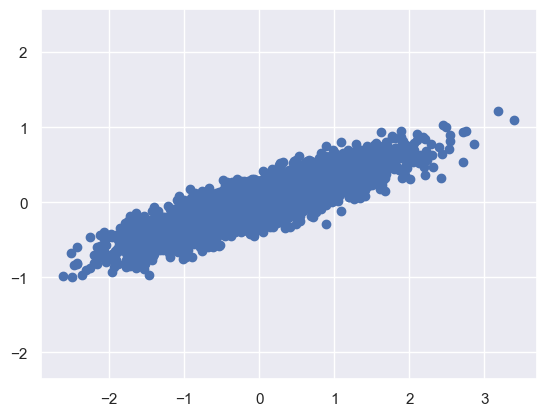

In [112]:
plt.scatter (X[:,0], X[:,1])
plt.axis ("equal");

In [113]:
student_data_df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [114]:
student_data_df_no_label=student_data_df.drop(columns=["Target"])

In [115]:
student_data_df_no_label.head()

,Marital status,Application mode,Application order,Course,Daytime Evening Attendance,Previous qualification,Previous qualification grade,Nacionality,Mother's qualification,Father's qualification,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,1.0,1,0,20.0,0.0,10.8,1.4,1.74
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,0.0,0.0,1,0,19.0,0.0,13.9,-0.3,0.79
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,0.0,0.0,1,0,19.0,0.0,10.8,1.4,1.74
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,0.0,1.0,0,0,20.0,0.0,9.4,-0.8,-3.12
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,0.0,1.0,0,0,45.0,0.0,13.9,-0.3,0.79


In [116]:
from sklearn.decomposition import PCA
pca = PCA().fit(student_data_df_no_label)

Text(0, 0.5, 'cumulative explained variance')

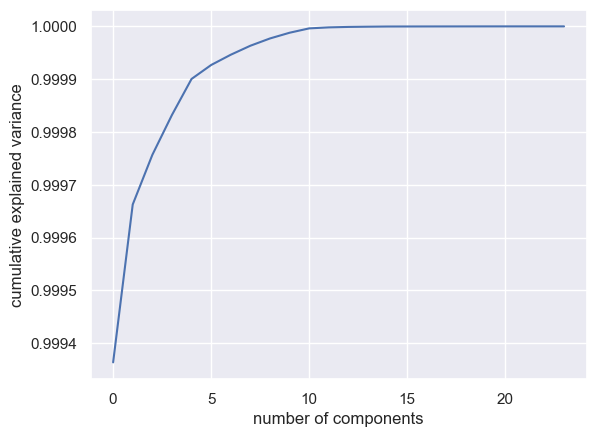

In [117]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [118]:
pca = PCA(10)
projected = pca.fit_transform(student_data_df_no_label)

In [119]:
projected.shape

(4424, 10)

In [120]:
projected

array([[ 8.68345919e+03, -8.70463479e-01, -1.41923456e+00, ...,
         3.87290621e+00, -3.36679164e+00, -1.29039653e+00],
       [-3.99484170e+02, -1.37283839e+01,  2.87643348e+01, ...,
        -3.93660894e-01, -1.64825552e+00, -3.06339275e+00],
       [-2.15543446e+02, -2.18879040e+00, -8.65741810e+00, ...,
        -1.71461803e-01,  9.14457124e-01,  5.55173783e-01],
       ...,
       [-6.45507003e+02, -3.05007564e+00, -4.29021279e+00, ...,
         1.87813276e+00, -3.37097923e-02, -6.52985979e-01],
       [-2.92486266e+02, -8.15910771e+00,  4.49521244e-01, ...,
        -7.33294016e+00, -2.65830409e-01, -2.26980880e+00],
       [-9.18505885e+02, -5.80106520e+00, -7.40588622e+00, ...,
         4.64641274e+00,  1.61326527e-01,  2.02329053e+01]])

In [121]:
student_data_df_pca = pd.DataFrame(projected, columns=["C1", "C2", "C3", "C4","C5","C6", "C7", "C8", "C9", "C10"])

In [122]:
student_data_df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,8683.459186,-0.870463,-1.419235,-5.977424,-14.921609,6.705531,4.853305,3.872906,-3.366792,-1.290397
1,-399.484170,-13.728384,28.764335,22.795599,14.755205,1.388506,-12.464627,-0.393661,-1.648256,-3.063393
2,-215.543446,-2.188790,-8.657418,-27.050026,9.728579,1.952056,8.391802,-0.171462,0.914457,0.555174
3,-918.553035,-9.001721,-18.528920,-18.678609,1.446520,2.180258,2.608002,0.796880,1.255379,-0.088672
4,840.433075,-0.098459,-36.634672,-0.087040,-8.164718,3.923116,23.083734,27.406870,2.387681,0.651746


In [123]:
student_data_df_pca["Target"]=student_data_df["Target"]

In [124]:
student_data_df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Target
0,8683.459186,-0.870463,-1.419235,-5.977424,-14.921609,6.705531,4.853305,3.872906,-3.366792,-1.290397,Dropout
1,-399.484170,-13.728384,28.764335,22.795599,14.755205,1.388506,-12.464627,-0.393661,-1.648256,-3.063393,Graduate
2,-215.543446,-2.188790,-8.657418,-27.050026,9.728579,1.952056,8.391802,-0.171462,0.914457,0.555174,Dropout
3,-918.553035,-9.001721,-18.528920,-18.678609,1.446520,2.180258,2.608002,0.796880,1.255379,-0.088672,Graduate
4,840.433075,-0.098459,-36.634672,-0.087040,-8.164718,3.923116,23.083734,27.406870,2.387681,0.651746,Graduate


In [125]:
student_data_df_array = student_data_df_pca.values

In [126]:
student_data_df_array

array([[8683.459185709085, -0.8704634787373847, -1.419234556061546, ...,
        -3.3667916439321823, -1.2903965290205552, 'Dropout'],
       [-399.4841703558844, -13.728383923995665, 28.76433476571068, ...,
        -1.6482555200263571, -3.0633927461770325, 'Graduate'],
       [-215.5434460958955, -2.188790399002538, -8.657418098776125, ...,
        0.9144571240192292, 0.5551737828070893, 'Dropout'],
       ...,
       [-645.507002783247, -3.050075643515662, -4.290212786816307, ...,
        -0.03370979231615651, -0.652985978661436, 'Dropout'],
       [-292.4862655984383, -8.159107709831611, 0.4495212439483243, ...,
        -0.26583040863019486, -2.2698087966558047, 'Graduate'],
       [-918.5058853397634, -5.801065203755739, -7.405886224937282, ...,
        0.1613265268279394, 20.23290528416453, 'Graduate']], dtype=object)

In [127]:
from sklearn.model_selection import train_test_split
X = student_data_df_array[:,0:10]
y = student_data_df_array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [128]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [129]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [130]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.545636 (0.018422)
LDA: 0.543940 (0.018205)
KNN: 0.514556 (0.021977)
CART: 0.440229 (0.018063)
NB: 0.499574 (0.025125)
SVM: 0.494773 (0.008139)


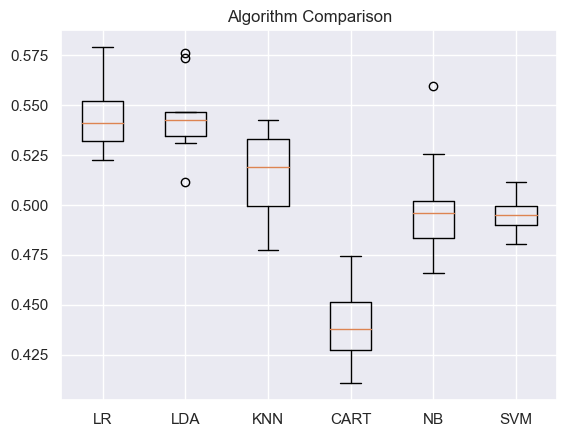

In [131]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [132]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [133]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.5344632768361582
[[108   1 165]
 [ 39   2 126]
 [ 80   1 363]]


In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
from numpy import asarray

In [181]:
data = asarray([["Dropout"], ["Graduate"], ["Enrolled"]])

In [182]:
data

array([['Dropout'],
       ['Graduate'],
       ['Enrolled']], dtype='<U8')

In [183]:
encoder = LabelEncoder()

In [184]:
result=encoder.fit_transform(data)

C:\Users\denis\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
result

array([0, 2, 1], dtype=int64)

In [186]:
from sklearn.preprocessing import OneHotEncoder

In [187]:
encoder = OneHotEncoder(sparse=False)

In [190]:
result=encoder.fit_transform(data)

C:\Users\denis\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [189]:
result

array([0, 2, 1], dtype=int64)

In [191]:
#VISUALIZATION:

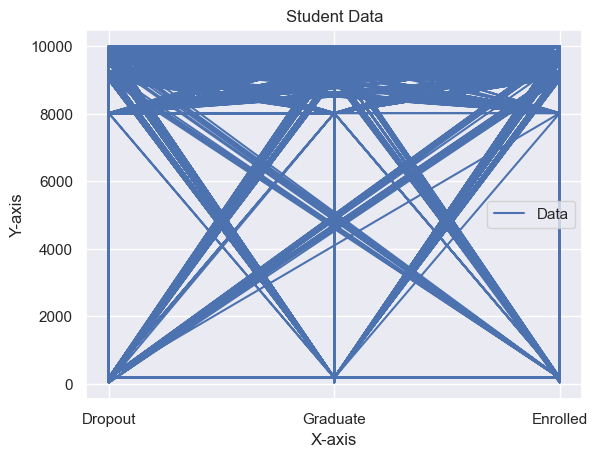

In [194]:
import matplotlib.pyplot as plt

# Example data
x = student_data_df["Target"]
y = student_data_df["Course"]

# Plotting the data
plt.plot(x, y, label='Data')
plt.title('Student Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()
